In [1]:
import numpy as np
import pandas as pd

In [42]:
learning_rate = 0.001
bias = 0.7
epochs = 50
final_epoch_loss = []

In [30]:
random_generator = np.random.default_rng()

def generate_data(n_feature, n_value):
    weights = random_generator.random((1, n_value))[0]
    features = random_generator.random((n_feature, n_value))
    targets = np.random.choice([0,1], n_feature)
    data = pd.DataFrame(features, columns =["n1", "n2", "n3", "n4"])
    data["target"] = targets
    return data, weights

In [31]:
def get_weighted_sum(features, weights, bias):
    return np.dot(features, weights) + bias

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
def cross_entropy_loss(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

In [34]:
def update_weights(weights, learning_rate, target, prediction, feature):
    new_weights = []
    for input_x, old_weight in zip(feature, weights):
        new_weight = old_weight + learning_rate*(target - prediction)*input_x
        new_weights.append(new_weight)
    return new_weights

def update_bias(bias, learning_rate, target, prediction):
    return bias + learning_rate*(target-prediction)

In [38]:
data, weights = generate_data(500, 4)

def train_model(data, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        individual_loss = []
        for i in range(0, len(data)):
            feature = data.loc[i][:-1] # ["n1", "n2", "n3", "n4"] .... features
            target = data.loc[i][-1] # .... "target"
            w_sum = get_weighted_sum(features=feature, weights=weights, bias=bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy_loss(target, prediction)
            individual_loss.append(loss)
            weights = update_weights(weights, learning_rate, target, prediction, feature)
            bias = update_bias(bias, learning_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        final_epoch_loss.append(average_loss)
        print(f"*********************************** Epoch: {epoch}, Loss: {average_loss}")


In [43]:
train_model(data, weights, bias, learning_rate, epochs)

*********************************** Epoch: 0, Loss: 0.5458162672368542
*********************************** Epoch: 1, Loss: 0.4749181342954992
*********************************** Epoch: 2, Loss: 0.41942927721794476
*********************************** Epoch: 3, Loss: 0.37868019102254946
*********************************** Epoch: 4, Loss: 0.3504389881033856
*********************************** Epoch: 5, Loss: 0.3317609554425631
*********************************** Epoch: 6, Loss: 0.3198205808301922
*********************************** Epoch: 7, Loss: 0.31235703665925507
*********************************** Epoch: 8, Loss: 0.30775437825123897
*********************************** Epoch: 9, Loss: 0.3049357921004348
*********************************** Epoch: 10, Loss: 0.3032136662520137
*********************************** Epoch: 11, Loss: 0.30215986797298783
*********************************** Epoch: 12, Loss: 0.301511676331063
*********************************** Epoch: 13, Loss: 0.301109174634315

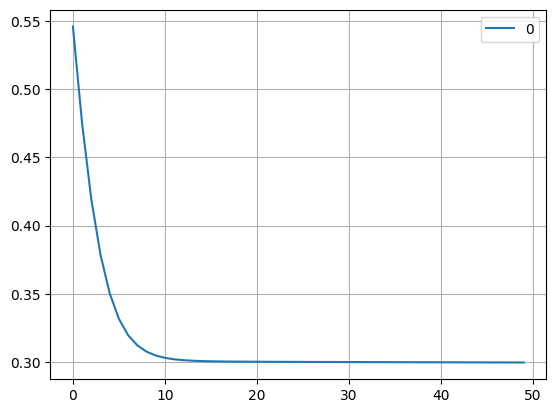

In [44]:
df = pd.DataFrame(final_epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()